# Random Forest Classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Total_L2 - Copy.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[4.968159e+01 1.389630e+00 4.636807e+01 ... 0.000000e+00 2.537860e+00
  0.000000e+00]
 [5.190220e+00 1.154100e-01 9.439760e+01 ... 5.940000e-03 2.880800e-01
  0.000000e+00]
 [8.836778e+01 2.495390e+00 2.214200e-01 ... 5.415220e+00 2.661740e+00
  8.346700e-01]
 ...
 [7.341292e+01 2.988200e+00 1.234310e+00 ... 2.173424e+01 2.942600e-01
  3.126100e-01]
 [3.580850e+00 9.356000e-02 9.486467e+01 ... 0.000000e+00 1.460920e+00
  0.000000e+00]
 [4.064321e+01 5.103200e-01 5.602504e+01 ... 6.316500e-01 5.214200e-01
  1.668350e+00]]


In [ ]:
print(y_train)

['Medium' 'Medium' 'Very High' ... 'Medium' 'Medium' 'Medium']


In [ ]:
print(X_test)

[[15.15582  4.38981 36.01287 ... 25.32844  1.51148 17.57746]
 [51.18203  3.17307 43.38348 ...  0.       2.23112  0.     ]
 [ 4.0134   0.91351 72.55525 ...  0.      22.51784  0.     ]
 ...
 [39.56976  0.10323 55.31244 ...  0.       4.85675  0.15517]
 [20.31384 14.04039 62.58748 ...  0.       2.63847  0.14708]
 [73.94178 19.58152  6.33746 ...  0.       0.13923  0.     ]]


In [ ]:
print(y_test)

['Low' 'Medium' 'Medium' 'Medium' 'Low' 'Medium' 'Low' 'Medium' 'Medium'
 'Low' 'Very High' 'Medium' 'Low' 'Medium' 'Medium' 'Very High'
 'Very High' 'High' 'Medium' 'Low' 'Very High' 'Medium' 'Medium'
 'Very High' 'Medium' 'Medium' 'Very High' 'High' 'Very High' 'Medium'
 'Medium' 'Medium' 'Low' 'Medium' 'Medium' 'Very High' 'Medium' 'Medium'
 'Medium' 'Very High' 'Medium' 'Medium' 'Very High' 'Very High'
 'Very High' 'Very High' 'Medium' 'High' 'High' 'Medium' 'Very High'
 'Very High' 'Medium' 'Low' 'Very High' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Very High' 'Medium' 'Very High' 'Medium'
 'Very High' 'Very High' 'Medium' 'High' 'Medium' 'Very High' 'Medium'
 'Medium' 'Medium' 'Very High' 'Medium' 'Very High' 'Medium' 'Medium'
 'Medium' 'High' 'Very High' 'Medium' 'High' 'Very High' 'Medium'
 'Very High' 'Very High' 'Medium' 'Very High' 'Medium' 'Medium'
 'Very High' 'Medium' 'Very High' 'Very High' 'Medium' 'Very High'
 'Very High' 'Medium' 'Medium' 'Medium' 'Very 

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.03612935 -0.65313988  0.43442999 ... -0.31927077 -0.15971233
  -0.0999257 ]
 [-1.94090878 -0.76164141  2.25609058 ... -0.3179135  -0.37906638
  -0.0999257 ]
 [ 1.75520594 -0.55898295 -1.31581686 ...  0.91808431 -0.14763401
   0.08631638]
 ...
 [ 1.09066519 -0.51701952 -1.27740004 ...  4.64691198 -0.37846383
  -0.03017222]
 [-2.01242345 -0.76350196  2.27380558 ... -0.31927077 -0.26471422
  -0.0999257 ]
 [-0.36550408 -0.7280143   0.80069886 ... -0.17494139 -0.35631568
   0.27233755]]


In [ ]:
print(X_test)

[[-1.49807298 -0.39767057  0.0416787  ...  5.46817162 -0.25978461
   3.82217838]
 [ 0.10280357 -0.5012776   0.32123068 ... -0.31927077 -0.18961955
  -0.0999257 ]
 [-1.99320247 -0.69368213  1.42765549 ... -0.31927077  1.78834015
  -0.0999257 ]
 ...
 [-0.41320438 -0.76267855  0.77367142 ... -0.31927077  0.06637996
  -0.06530222]
 [-1.26886893  0.42408913  1.04959862 ... -0.31927077 -0.14990284
  -0.06710736]
 [ 1.11416585  0.89592371 -1.08384813 ... -0.31927077 -0.39357929
  -0.0999257 ]]


**For loop for both Models**

In [ ]:
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state = 0, max_iter=1000)))
models.append(('RF', RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f %% (%f %%)" % (name, cv_results.mean()*100, cv_results.std()*100)
	print(msg)

LR: 72.728508 % (3.060414 %)
RF: 76.587666 % (2.440850 %)


**boxplot algorithm comparison**

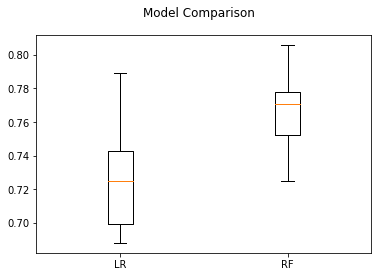

In [ ]:
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()